In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from datetime import datetime as dt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25, 10
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
#Mise à jour du fichier de météo

new_meteo = None
for i in range(6, 10):
    meteo_df = pd.read_csv("./raw_data/paris_from_2009/export-paris20190{}.csv".format(str(i)), skiprows=3)
    new_meteo = pd.concat([new_meteo, meteo_df], axis=0)

new_meteo["DATE"] = pd.to_datetime(new_meteo["DATE"])
new_meteo = new_meteo[["DATE", "MAX_TEMPERATURE_C"]].rename(columns={"MAX_TEMPERATURE_C": "MAX_TEMP"})
new_meteo.sort_values(by="DATE", inplace=True)
new_meteo.head()

new_meteo.to_csv("./formatted_data/meteo_paris_2019_juin_sept.csv", sep=";", index=False)

In [2]:
new_meteo = None
for i in range(2009, 2020):
    meteo_df = pd.read_csv("./raw_data/paris_from_2009/export-paris{}.csv".format(str(i)), skiprows=3)
    new_meteo = pd.concat([new_meteo, meteo_df], axis=0)

new_meteo["DATE"] = pd.to_datetime(new_meteo["DATE"])
new_meteo = new_meteo[["DATE", "MAX_TEMPERATURE_C"]].rename(columns={"MAX_TEMPERATURE_C": "MAX_TEMP"})
new_meteo.sort_values(by="DATE", inplace=True)
new_meteo.head()

,DATE,MAX_TEMP
0,2009-01-01,4
1,2009-01-02,1
2,2009-01-03,1
3,2009-01-04,0
4,2009-01-05,0


In [3]:
old_meteo = pd.read_csv("./raw_data/meteo_paris_1975-2018.csv", sep=";")
old_meteo = old_meteo[(old_meteo["LONGITUDE"]==2.38980)]
print(len(old_meteo))
old_meteo["DAY"] = old_meteo["DAY"].apply(lambda x: dt.strptime(str(x), "%Y%m%d"))
old_meteo = old_meteo[["DAY", "TEMPERATURE_MAX"]].rename(columns={"DAY": "DATE", "TEMPERATURE_MAX": "MAX_TEMP"})
old_meteo.sort_values(by="DATE", inplace=True)
old_meteo.head()

16071


,DATE,MAX_TEMP
0,1975-01-01,8.1
1,1975-01-02,3.2
2,1975-01-03,4.5
3,1975-01-04,6.4
4,1975-01-05,7.0


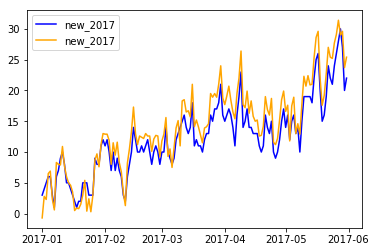

In [4]:
#Check that time series are coherent in common dates
new_2017 = new_meteo[(new_meteo["DATE"] >= dt(2017, 1, 1)) & (new_meteo["DATE"] < dt(2017, 6, 1))]
old_2017 = old_meteo[(old_meteo["DATE"] >= dt(2017, 1, 1)) & (old_meteo["DATE"] < dt(2017, 6, 1))]

plt.plot(new_2017["DATE"], new_2017["MAX_TEMP"], label="new_2017", color="blue")
plt.plot(old_2017["DATE"], old_2017["MAX_TEMP"], label="new_2017", color="orange")
plt.legend()
plt.show()
# Ok...

In [5]:
full_meteo = pd.concat([old_meteo[old_meteo["DATE"] < new_meteo["DATE"].min()], new_meteo], axis=0)
full_meteo.sort_values(by="DATE", inplace=True)
full_meteo.head()
print(len(full_meteo))
print(len(full_meteo))
full_meteo.isnull().sum()
print(len(full_meteo))

16220
16220
16220


In [6]:
date_range = pd.date_range(start="01/01/1975", end="31/05/2019")
full_meteo.index = full_meteo["DATE"]
full_meteo_r = full_meteo.reindex(date_range).sort_index()

In [7]:
full_meteo_r["DATE"] = full_meteo_r.index
print(full_meteo_r.isnull().sum())
full_meteo = full_meteo_r.fillna(method='ffill')
print(full_meteo.isnull().sum())
full_meteo["DAY"] = full_meteo["DATE"].apply(lambda x: str(x)[5:10])
full_meteo["YEAR"] = full_meteo["DATE"].apply(lambda x: x.year)

DATE        0
MAX_TEMP    2
dtype: int64
DATE        0
MAX_TEMP    0
dtype: int64


In [8]:
full_meteo.to_csv("./formatted_data/full_meteo.csv", index=False)

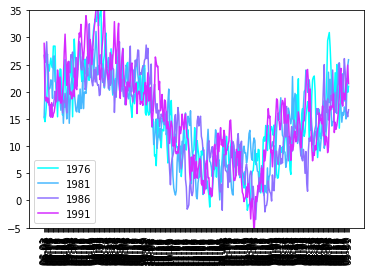

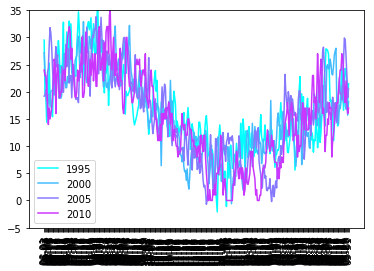

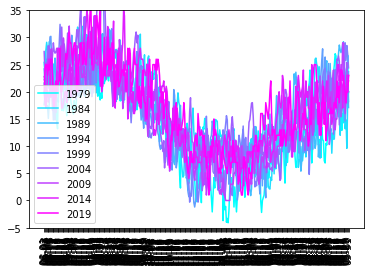

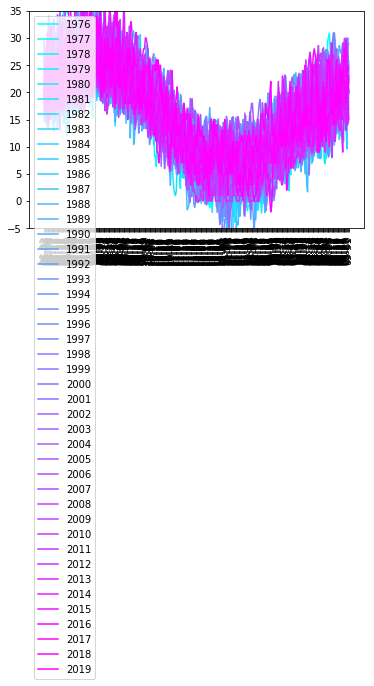

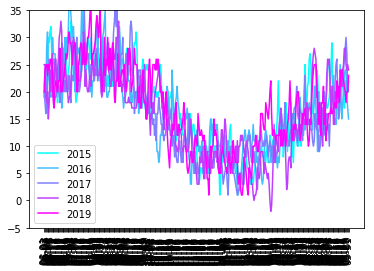

In [9]:
def plot_year_map(full_meteo, start_year, end_year, step=1):
    full_meteo = full_meteo[full_meteo["DAY"] != "02-29"]
    cmap = plt.get_cmap('cool')
    colors = cmap(np.linspace(0, 1.0, end_year - start_year))
    for i in range(start_year, end_year, step):
        met_i = full_meteo[(full_meteo["DATE"] >= dt(i-1, 6, 1)) & (full_meteo["DATE"] <= dt(i, 5, 31))]
        plt.plot(met_i["DAY"], met_i["MAX_TEMP"], color=colors[i-start_year], label=str(i))
        plt.xticks(rotation="vertical")
        plt.ylim(-5, 35)
    plt.legend()
    plt.show()
    
plot_year_map(full_meteo, 1976, 1995, step=5)
plot_year_map(full_meteo, 1995, 2015, step=5)
plot_year_map(full_meteo, 1979, 2020, step=5)
plot_year_map(full_meteo, 1976, 2020)
plot_year_map(full_meteo, 2015, 2020)